In [48]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop
from sklearn.preprocessing import LabelEncoder


In [2]:
train = ImageDataGenerator()
test = ImageDataGenerator()

train_dataset = train.flow_from_directory(directory="data/train",
                                          target_size=(150,150),
                                          batch_size = 10,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(directory="data/test",
                                          target_size=(150,150),
                                          batch_size =10,
                                          class_mode = 'binary')
                                         

Found 312 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'chilli': 0, 'turmeric': 1}

In [4]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for chilli or 1 for turmeric
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 10, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/10
10/10 [==============================] - 4s 379ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.0337 - val_accuracy: 0.9917
Epoch 2/10
10/10 [==============================] - 3s 354ms/step - loss: 0.1138 - accuracy: 0.9457 - val_loss: 0.6965 - val_accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 4s 359ms/step - loss: 0.8028 - accuracy: 0.9022 - val_loss: 0.2489 - val_accuracy: 0.9417
Epoch 4/10
10/10 [==============================] - 4s 380ms/step - loss: 0.3053 - accuracy: 0.9100 - val_loss: 0.3757 - val_accuracy: 0.8500
Epoch 5/10
10/10 [==============================] - 4s 385ms/step - loss: 0.3913 - accuracy: 0.8200 - val_loss: 0.3636 - val_accuracy: 0.8583
Epoch 6/10
10/10 [==============================] - 4s 360ms/step - loss: 0.3499 - accuracy: 0.8500 - val_loss: 0.3398 - val_accuracy: 0.8833
Epoch 7/10
10/10 [==============================] - 4s 365ms/step - loss: 0.3518 - accuracy: 0.8600 - val_loss: 0.3373 - val_accuracy: 0.8833
Epoch 

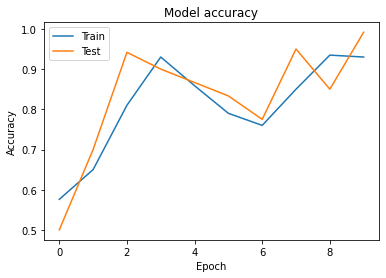

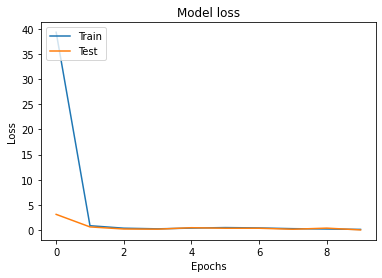

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img)
 
    Y = image.img_to_array(img)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("TURMERIC",fontsize=30)
        print("TURMERIC")
    
    elif val == 0:
        
        plt.xlabel("CHILLI",fontsize=30)
        print("CHILLI")

[[0.]]
CHILLI


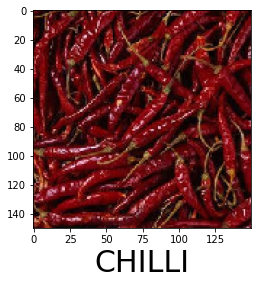

In [13]:
predictImage(r"C:\Users\kmgs4\OneDrive\Documents\GitHub\Spices-Classifier-main\image2.jpg")

In [32]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 100, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/100
10/10 [==============================] - 4s 380ms/step - loss: 0.3158 - accuracy: 0.8500 - val_loss: 0.3461 - val_accuracy: 0.8667
Epoch 2/100
10/10 [==============================] - 4s 352ms/step - loss: 0.3031 - accuracy: 0.8587 - val_loss: 0.2922 - val_accuracy: 0.8750
Epoch 3/100
10/10 [==============================] - 4s 383ms/step - loss: 0.2650 - accuracy: 0.9100 - val_loss: 0.2483 - val_accuracy: 0.9250
Epoch 4/100
10/10 [==============================] - 4s 399ms/step - loss: 0.2029 - accuracy: 0.9700 - val_loss: 0.1922 - val_accuracy: 0.9500
Epoch 5/100
10/10 [==============================] - 4s 380ms/step - loss: 0.1854 - accuracy: 0.9600 - val_loss: 0.2046 - val_accuracy: 0.9250
Epoch 6/100
10/10 [==============================] - 4s 364ms/step - loss: 0.1241 - accuracy: 0.9800 - val_loss: 0.1101 - val_accuracy: 0.9750
Epoch 7/100
10/10 [==============================] - 4s 365ms/step - loss: 0.1598 - accuracy: 0.9600 - val_loss: 0.1620 - val_accuracy: 0.9667

Epoch 58/100
10/10 [==============================] - 4s 355ms/step - loss: 0.3180 - accuracy: 0.8700 - val_loss: 0.2918 - val_accuracy: 0.8917
Epoch 59/100
10/10 [==============================] - 3s 342ms/step - loss: 0.2072 - accuracy: 0.9348 - val_loss: 0.2826 - val_accuracy: 0.8917
Epoch 60/100
10/10 [==============================] - 4s 359ms/step - loss: 0.2318 - accuracy: 0.9100 - val_loss: 0.2384 - val_accuracy: 0.9000
Epoch 61/100
10/10 [==============================] - 4s 359ms/step - loss: 0.3637 - accuracy: 0.8700 - val_loss: 0.2742 - val_accuracy: 0.9000
Epoch 62/100
10/10 [==============================] - 4s 386ms/step - loss: 0.2630 - accuracy: 0.9100 - val_loss: 0.2723 - val_accuracy: 0.9000
Epoch 63/100
10/10 [==============================] - 4s 375ms/step - loss: 0.2919 - accuracy: 0.8804 - val_loss: 0.2718 - val_accuracy: 0.9000
Epoch 64/100
10/10 [==============================] - 3s 361ms/step - loss: 0.3149 - accuracy: 0.8696 - val_loss: 0.2730 - val_accuracy:

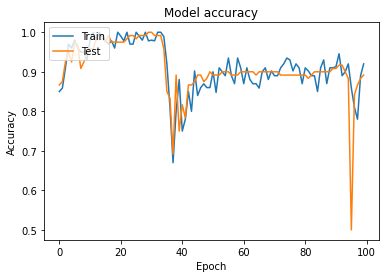

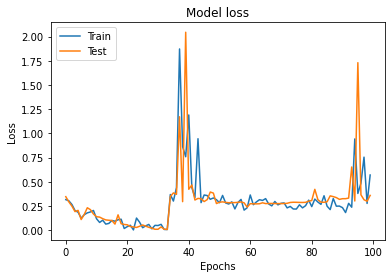

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img)
 
    Y = image.img_to_array(img)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("TURMERIC",fontsize=30)
        print("TURMERIC")
    
    elif val == 0:
        
        plt.xlabel("CHILLI",fontsize=30)
        print("CHILLI")

[[0.]]
CHILLI


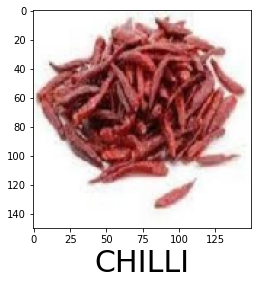

In [41]:
predictImage(r"C:\Users\kmgs4\OneDrive\Documents\GitHub\Spices-Classifier-main\chilli_test.jpg")

[[0.8029325]]


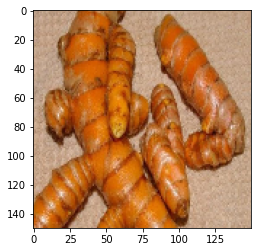

In [46]:
predictImage(r"C:\Users\kmgs4\OneDrive\Documents\GitHub\Spices-Classifier-main\image.jpg")

In [49]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

In [50]:
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\kmgs4\AppData\Local\Temp\tmpwjtxa8ax\assets


In [51]:
open('cnn.tflite','wb').write(tfmodel)

13816900